In [1]:
import tensorflow as tf
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

cifar_mnist = tf.keras.datasets.cifar10

(train_images, train_labels),(test_images, test_labels) = cifar_mnist.load_data()

(50000, 32, 32, 3)
(10000, 32, 32, 3)


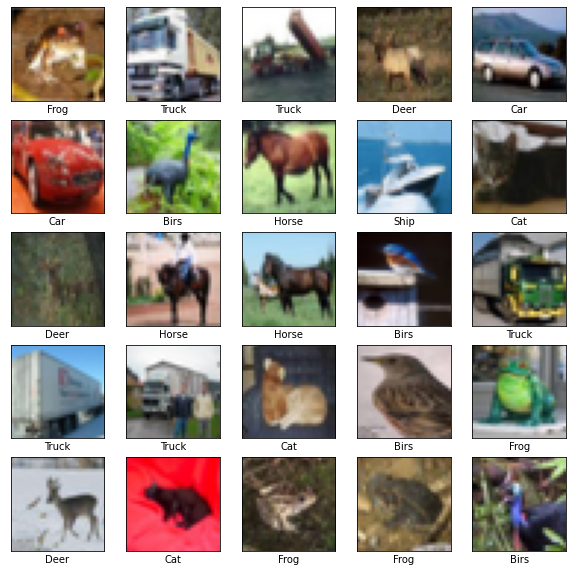

In [2]:
class_names = ['Airplane','Car','Birs','Cat','Deer','Dog','Frog','Horse','Ship','Truck']

print(train_images.shape)
print(test_images.shape)

plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
train_images  = train_images.astype('float32')  / 255
test_images  = test_images.astype('float32')  / 255
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

In [15]:
import keras

model = keras.Sequential([
    Conv2D(32, kernel_size=(3,3), padding='same', input_shape=train_images.shape[1:], activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3,3), padding='same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

epochs=100

batch_size=64

history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=epochs, shuffle=True, 
                    callbacks=[early_stopping_callback])

loss, acc = model.evaluate(test_images, test_labels, verbose=2)

print("\n Test Loss : %.4f, Test Accuracy : %.4f" %(loss, acc))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)             

1563/1563 [==============================] - 33s 21ms/step - loss: 0.8635 - accuracy: 0.6900 - val_loss: 0.7711 - val_accuracy: 0.7355
Epoch 46/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8592 - accuracy: 0.6897 - val_loss: 0.7884 - val_accuracy: 0.7280
Epoch 47/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8651 - accuracy: 0.6894 - val_loss: 0.7883 - val_accuracy: 0.7302
Epoch 48/100
1563/1563 [==============================] - 32s 20ms/step - loss: 0.8614 - accuracy: 0.6882 - val_loss: 0.7628 - val_accuracy: 0.7345
Epoch 49/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8495 - accuracy: 0.6943 - val_loss: 0.7896 - val_accuracy: 0.7309
Epoch 50/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8485 - accuracy: 0.6929 - val_loss: 0.7758 - val_accuracy: 0.7348
Epoch 51/100
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8457 - accuracy: 0.6971 - val_loss: 0.7748 

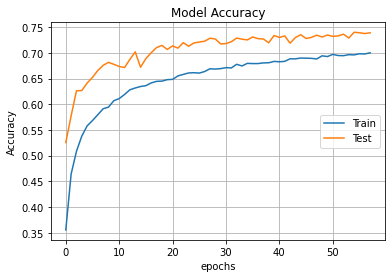

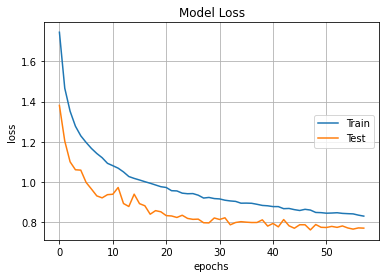

In [16]:
def plt_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss']) 
    plt.title('Model Loss')
    plt.legend(['Train','Test'], loc='right')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.grid()

             
def plt_show_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy']) 
    plt.title('Model Accuracy')
    plt.legend(['Train','Test'], loc='right')
    plt.xlabel('epochs')
    plt.ylabel('Accuracy')
    plt.grid()  

             
plt_show_acc(history)  
plt.show()
plt_show_loss(history)
plt.show()

predictions = model.predict(test_images)

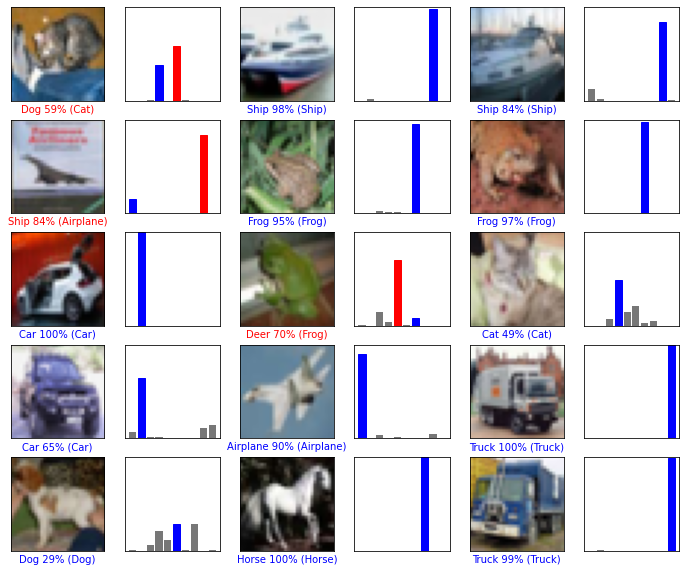

In [18]:
# 이미지 클래스를 예측하여 그래프/신뢰도를 출력하는 함수 정의

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array), 
                                  class_names[np.argmax(true_label)]), 
                                  color=color)
    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')
    
        
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()